Chapter 3: Introduction to Quantum Algorithms


In [2]:
!pip install cirq --quiet
!pip install qiskit --quiet
!pip install qiskit-aer --quiet

In [3]:
import cirq

In [4]:
qubit = cirq.GridQubit(0,0)

In [5]:
circuit = cirq.Circuit([cirq.H(qubit), cirq.measure(qubit, key='m')])

In [6]:
print('Circuit Follows')
print(circuit)

Circuit Follows
(0, 0): ───H───M('m')───


In [7]:
sim = cirq.Simulator()

In [8]:
output = sim.run(circuit,repetitions=100)

In [9]:
print("Measurement Output:")
print(output)
print("Histogram stats follow")
print(output.histogram(key='m'))

Measurement Output:
m=1110100001110011000101111011010110010001111110111111000111010100101010010101110001011100000001101111
Histogram stats follow
Counter({1: 55, 0: 45})


Circuit Follows
(0, 0): ───H───M('m')───
0.4
Circuit Follows
(0, 0): ───H───M('m')───
0.2727272727272727
Circuit Follows
(0, 0): ───H───M('m')───
0.75
Circuit Follows
(0, 0): ───H───M('m')───
0.46153846153846156
Circuit Follows
(0, 0): ───H───M('m')───
0.5
Circuit Follows
(0, 0): ───H───M('m')───
0.4
Circuit Follows
(0, 0): ───H───M('m')───
0.5625
Circuit Follows
(0, 0): ───H───M('m')───
0.35294117647058826
Circuit Follows
(0, 0): ───H───M('m')───
0.7222222222222222
Circuit Follows
(0, 0): ───H───M('m')───
0.3684210526315789
Circuit Follows
(0, 0): ───H───M('m')───
0.6
Circuit Follows
(0, 0): ───H───M('m')───
0.23809523809523808
Circuit Follows
(0, 0): ───H───M('m')───
0.36363636363636365
Circuit Follows
(0, 0): ───H───M('m')───
0.4782608695652174
Circuit Follows
(0, 0): ───H───M('m')───
0.3333333333333333
Circuit Follows
(0, 0): ───H───M('m')───
0.72
Circuit Follows
(0, 0): ───H───M('m')───
0.5384615384615384
Circuit Follows
(0, 0): ───H───M('m')───
0.5925925925925926
Circuit Follows


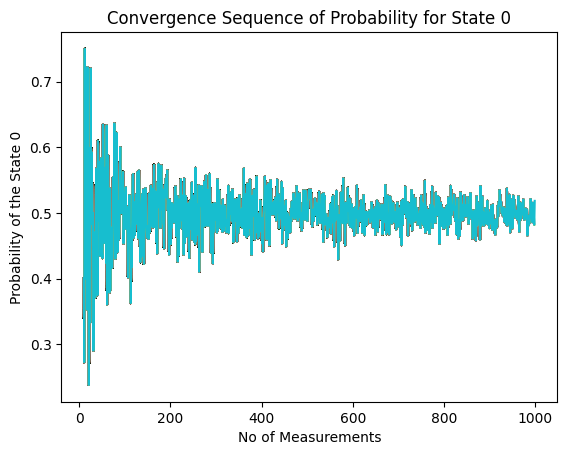

In [10]:
# Import the Package cirq
import cirq
import matplotlib.pyplot as plt

def hadamard_state_measurement(copies):
    # Define a Qubit
    qubit = cirq.GridQubit(0, 0)
    # Create a Circuit in cirq
    circuit = cirq.Circuit([cirq.H(qubit)
    ,cirq.measure(qubit, key='m')])
    print("Circuit Follows")
    print(circuit)
    sim = cirq.Simulator()
    output = sim.run(circuit, repetitions=copies)
    res = output.histogram(key='m')
    prob_0 = dict(res)[0] / copies
    print(prob_0)
    return prob_0
def main(copies_low=10, copies_high=1000):
    probability_for_zero_state_trace = []
    copies_trace = []
    for n in range(copies_low, copies_high):
        copies_trace.append(n)
        prob_0 = hadamard_state_measurement(n)
        probability_for_zero_state_trace.append(prob_0)
        plt.plot(copies_trace, probability_for_zero_state_trace)
    plt.xlabel('No of Measurements')
    plt.ylabel("Probability of the State 0")
    plt.title("Convergence Sequence of Probability for State 0")
    plt.show()
if __name__ == '__main__':
    main()

Figure 3-2. Probability convergence with an increase in the number of 
measurements

In [11]:
"""
Measure a qubit after Hadamard Transform
"""
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
# Use Aer's qasm_simulator
simulator = AerSimulator()
# Create a Quantum Circuit with 1 Qubit
circuit = QuantumCircuit(1, 1)
# Add a H gate on Qubit 0
circuit.h(0)
# Map the quantum measurement to the classical register
circuit.measure([0], [0])
# Execute the circuit on the qasm simulator
job = transpile(circuit, simulator)
# Grab results from the job
result = simulator.run(job, shots=1024).result()
# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 0 and 1 are:",counts)
# Draw the circuit
print(circuit.draw(output='text'))


Total count for 0 and 1 are: {'1': 560, '0': 464}
     ┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 


Bell State Creation and MEasurement

Listing 3-4. Bell State Creation and Measurement Using Cirq

In [12]:
import cirq
# Define the two qubits using LineQubit
q_register = [cirq.LineQubit(i) for i in range(2)]
# Define the Cirquit with a Hadamard Gate on the qubit 0
# followed by CNOT operation
cirquit = cirq.Circuit([cirq.H(q_register[0]), cirq.CNOT(q_register[0], 
q_register[1])])
# Measure both the qubits
cirquit.append(cirq.measure(*q_register,key='z'))
print("Circuit")
print(cirquit)
# Define the Simulator
sim = cirq.Simulator()
# Simulate the cirquit for 100 iterations
output = sim.run(cirquit, repetitions=100)
print("Measurement Output")
print(output.histogram(key='z'))

Circuit
0: ───H───@───M('z')───
          │   │
1: ───────X───M────────
Measurement Output
Counter({3: 52, 0: 48})


Listing 3-5. Bell State Creation and Measurement Using Qiskit

In [13]:
"""
Quantum Entanglement Example with Qiskit
"""
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
# Use Aer's qasm_simulator
simulator = AerSimulator()
# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)
# Add a H gate on Qubit 0
circuit.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)
# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])
# Execute the circuit on the qasm simulator
job = transpile(circuit, simulator)
# Grab results from the job
result = simulator.run(job, shots=1024).result()
# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)
# Draw the circuit
print(circuit.draw(output='text'))


Total count for 00 and 11 are: {'00': 510, '11': 514}
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


Listing 3-6. Simulating Quantum Teleportation

In [14]:
import cirq
def quantum_teleportation(qubit_to_send_op='H',
    num_copies=100):
    Q1, Q2, Q3 = [cirq.LineQubit(i) for i in range(3)]
    cirquit = cirq.Circuit()
    """
    Q1 : Alice State qubit to be sent to Bob
    Q2: Alices control qubit
    Q3: Bobs control qubit
    Set a state for Q1 based on qubit_to_send_op :
Implemented operators H,X,Y,Z,I
"""
    if qubit_to_send_op == 'H':
        cirquit.append(cirq.H(Q1))
    elif qubit_to_send_op == 'X':
        cirquit.append(cirq.X(Q1))
    elif qubit_to_send_op == 'Y':
        cirquit.append(cirq.X(Q1))
    elif qubit_to_send_op == 'I':
        cirquit.append(cirq.I(Q1))
    else:
        raise NotImplementedError("Yet to be implemented")
    # Entangle Alice and Bob's control qubits : Q2 and Q3
    cirquit.append(cirq.H(Q2))
    cirquit.append(cirq.CNOT(Q2, Q3))
    # CNOT Alice's data Qubit Q1 with control Qubit Q2
    cirquit.append(cirq.CNOT(Q1, Q2))
    # Transform Alice's data Qubit Q1
    # on +/- basis using Hadamard Transform
    cirquit.append(cirq.H(Q1))
    # Measure Alice's qubit Q1 and Q2
    cirquit.append(cirq.measure(Q1, Q2))
    # Do a CNOT on Bob's qubit Q3 using Alice's
    # control qubit Q2 after measurement
    cirquit.append(cirq.CNOT(Q2, Q3))
    # Do a Conditioned Z Operation on Bob's qubit Q3
    # using Alice's control qubit Q1 after measurement
    cirquit.append(cirq.CZ(Q1, Q3))
    # Measure the final transmitted state to Bob in Q3
    cirquit.append(cirq.measure(Q3, key='Z'))
    print("Circuit")
    print(cirquit)
    sim = cirq.Simulator()
    output = sim.run(cirquit, repetitions=num_copies)
    print("Measurement Output")
    print(output.histogram(key='Z'))
if __name__ == '__main__':
    quantum_teleportation(qubit_to_send_op='H')

Circuit
0: ───H───────@───H───M───────@────────────
              │       │       │
1: ───H───@───X───────M───@───┼────────────
          │               │   │
2: ───────X───────────────X───@───M('Z')───
Measurement Output
Counter({0: 51, 1: 49})


Listing 3-7. Quantum Random Number Generator

In [15]:
import cirq
import numpy as np
def random_number_generator(low=0,high=2**10,m=10):
    """
    :param low: lower bound of numbers to be generated
    :param high: Upper bound of numbers to be generated
    :param number m : Number of random numbers to output
    :return: string of random numbers
    """
    # Determine the number of Qubits required
    qubits_required = int(np.ceil(np.log2(high - low)))
    print(qubits_required)
    # Define the qubits
    Q_reg = [cirq.LineQubit(c) for c in range(qubits_required)]
    # Define the circuit
    circuit = cirq.Circuit()
    circuit.append(cirq.H(Q_reg[c]) for c in range(qubits_required))
    circuit.append(cirq.measure(*Q_reg, key="z"))
    print(circuit)
    # Simulate the circuit
    sim = cirq.Simulator()
    num_gen = 0
    output = []
    while num_gen <= m :
        result = sim.run(circuit,repetitions=1)
        rand_number = result.data.iat[0, 0] + low
        if rand_number < high :
            output.append(rand_number)
            num_gen += 1
    return output
if __name__ == '__main__':
    output = random_number_generator()
    print("Sampled Random Numbers")
    print(output)
    print("Mean of the Sampled Random Numbers", np.mean(output))

10
0: ───H───M('z')───
          │
1: ───H───M────────
          │
2: ───H───M────────
          │
3: ───H───M────────
          │
4: ───H───M────────
          │
5: ───H───M────────
          │
6: ───H───M────────
          │
7: ───H───M────────
          │
8: ───H───M────────
          │
9: ───H───M────────
Sampled Random Numbers
[np.int64(615), np.int64(797), np.int64(166), np.int64(554), np.int64(335), np.int64(694), np.int64(587), np.int64(131), np.int64(739), np.int64(985), np.int64(645)]
Mean of the Sampled Random Numbers 568.0


In [16]:
[print(output[i].item(), end=', ') for i in range(len(output))]

615, 797, 166, 554, 335, 694, 587, 131, 739, 985, 645, 

[None, None, None, None, None, None, None, None, None, None, None]

Listing 3-8. Deutsch–Jozsa Implementation

In [17]:
import cirq
import numpy as np
print('cirq version',cirq.__version__)
print('numpy version',np.__version__)

def oracle(data_reg, y_reg, circuit, is_balanced=True):
    if is_balanced:
        circuit.append([cirq.CNOT(data_reg[0], y_reg), cirq.CNOT(data_reg[1], y_reg)])

    return circuit


def deutsch_jozsa(domain_size: int, func_type_to_simulate: str = "balanced", copies: int = 1000):
    """
    
    :param domain_size: Number of inputs to the function
    :param oracle: Oracle simulating the function
    :return: whether the function is balanced or constant
    """
    #  Define the data register and the target qubit

    reqd_num_qubits = int(np.ceil(np.log2(domain_size)))
    #Define the input qubits 
    data_reg = [cirq.LineQubit(c) for c in range(reqd_num_qubits)]
    # Define the Target qubits
    y_reg = cirq.LineQubit(reqd_num_qubits)
    # Define cirq Circuit
    circuit = cirq.Circuit()
    # Define equal superposition state for the input qubits
    circuit.append(cirq.H(data_reg[c]) for c in range(reqd_num_qubits))
    # Define Minus superposition state 
    circuit.append(cirq.X(y_reg))
    circuit.append(cirq.H(y_reg))
    
    # Check for nature of function : balanced/constant to simulate 
    # and implement Oracle accordingly 
    if func_type_to_simulate == 'balanced':
        is_balanced = True
    else:
        is_balanced = False
         
    circuit = oracle(data_reg, y_reg, circuit, is_balanced=is_balanced)
    # Apply Hadamard transform on each of the input qubits
    circuit.append(cirq.H(data_reg[c]) for c in range(reqd_num_qubits))
    # Measure the input qubits
    circuit.append(cirq.measure(*data_reg, key='z'))
    print("Circuit Diagram Follows")
    print(circuit)
    sim = cirq.Simulator()
    result = sim.run(circuit, repetitions=copies)
    print(result.histogram(key='z'))


if __name__ == '__main__':
    print("Execute Deutsch Jozsa for a Balanced Function of Domain size 4")
    deutsch_jozsa(domain_size=4, func_type_to_simulate='balanced', copies=1000)

    print("Execute Deutsch Jozsa for a Constant Function of Domain size 4")
    deutsch_jozsa(domain_size=4, func_type_to_simulate='', copies=1000)

cirq version 1.6.1
numpy version 2.3.4
Execute Deutsch Jozsa for a Balanced Function of Domain size 4
Circuit Diagram Follows
0: ───H───────@───H───────M('z')───
              │           │
1: ───H───────┼───@───H───M────────
              │   │
2: ───X───H───X───X────────────────
Counter({3: 1000})
Execute Deutsch Jozsa for a Constant Function of Domain size 4
Circuit Diagram Follows
0: ───H───H───M('z')───
              │
1: ───H───H───M────────

2: ───X───H────────────
Counter({0: 1000})


Listing 3-9. Implementing the Bernstein–Vajirani Algorithm

In [18]:
import cirq
import numpy as np
print('cirq version',cirq.__version__)
print('numpy version',np.__version__)



def func_bit_pattern(num_qubits):
    """
    Create the Oracle function Parameters
    :param num_qubits: 
    :return: 
    """
    bit_pattern = []
    for i in range(num_qubits):
        bit_pattern.append(np.random.randint(0, 2))
    print(f"Function bit pattern: {''.join([str(x) for x in bit_pattern]) }")
    return bit_pattern

def oracle(input_qubits,target_qubit,circuit,num_qubits,bit_pattern):
    """
    Define the oracle 
    :param input_qubits: 
    :param target_qubit: 
    :param circuit:  
    :param num_qubits: 
    :param bit_pattern: 
    :return: 
    """
    for i in range(num_qubits):
        if bit_pattern[i] == 1:
            circuit.append(cirq.CNOT(input_qubits[i],target_qubit))
    return circuit

def BV_algorithm(num_qubits, bit_pattern):
    """
    
    :param num_qubits: 
    :return: 
    """
    input_qubits = [cirq.LineQubit(i) for i in range(num_qubits)]
    target_qubit = cirq.LineQubit(num_qubits)
    circuit = cirq.Circuit()
    circuit.append([cirq.H(input_qubits[i]) for i in range(num_qubits)])
    circuit.append([cirq.X(target_qubit), cirq.H(target_qubit)])
    circuit = oracle(input_qubits, target_qubit,circuit,num_qubits,bit_pattern)
    circuit.append([cirq.H(input_qubits[i]) for i in range(num_qubits)])
    circuit.append(cirq.measure(*input_qubits,key='Z'))
    print("Bernstein Vajirani Circuit Diagram")
    print(circuit)
    sim = cirq.Simulator()
    results = sim.run(circuit, repetitions=1000)
    results = dict(results.histogram(key='Z'))
    print(results)
    results_binary = {}
    for k in results.keys():
        results_binary["{0:b}".format(k)] = results[k]
    print("Distribution of bit pattern output from Bernstein Vajirani Algorithm")
    print(results_binary)
    
def main(num_qubits=6, bit_pattern=None):
    if bit_pattern is None:
        bit_pattern = func_bit_pattern(num_qubits)
        
    BV_algorithm(num_qubits, bit_pattern)
    
if __name__ == '__main__':
    main()

cirq version 1.6.1
numpy version 2.3.4
Function bit pattern: 110001
Bernstein Vajirani Circuit Diagram
0: ───H───────@───H───────────M('Z')───
              │               │
1: ───H───────┼───@───H───────M────────
              │   │           │
2: ───H───H───┼───┼───────────M────────
              │   │           │
3: ───H───H───┼───┼───────────M────────
              │   │           │
4: ───H───H───┼───┼───────────M────────
              │   │           │
5: ───H───────┼───┼───@───H───M────────
              │   │   │
6: ───X───H───X───X───X────────────────
{49: 1000}
Distribution of bit pattern output from Bernstein Vajirani Algorithm
{'110001': 1000}


Listing 3-10. Bell’s Inequality


In [19]:
import cirq
import numpy as np
print('cirq version',cirq.__version__)
print('numpy version',np.__version__)


def bell_inequality_test_circuit():
    """
    Define 4 qubits
    0th qubit - Alice
    1st qubit - contains the bit sent to Alice by the referee
    2nd qubit - Bob's qubit
    3rd qubit - contains the bit sent to Bob by the referee
        :return: 
    """
    qubits = [cirq.LineQubit(i) for i in range(4)]
    circuit = cirq.Circuit()
    # Entangle Alice and Bob to the Bell State
    circuit.append([cirq.H(qubits[0]), cirq.CNOT(qubits[0], qubits[2])])
    # Apply X^(-0.25) on Alice's Qubit
    circuit.append([cirq.X(qubits[0])**(-0.25)])
    # Apply Hadamard transform to the referee Qubits for Alice and Bob
    # This is done to randomize the qubit
    circuit.append([cirq.H(qubits[1]), cirq.H(qubits[3])])
    # Perform a Conditional X^0.5 on Alice and Bob Qubits based on corresponding referee qubits
    circuit.append([cirq.CNOT(qubits[1], qubits[0])**0.5])
    circuit.append([cirq.CNOT(qubits[3], qubits[2])**0.5])
    # Measure all the qubits
    circuit.append(cirq.measure(qubits[0], key='A'))
    circuit.append(cirq.measure(qubits[1], key='r_A'))
    circuit.append(cirq.measure(qubits[2], key='B'))
    circuit.append(cirq.measure(qubits[3], key='r_B'))
    return circuit

def main(iters=1000):
    # Build the Bell inequality test circuit
    circuit = bell_inequality_test_circuit()
    print("Bell Inequality Test Circuit")
    print(circuit)
    #Simulate for several iterations
    sim = cirq.Simulator()
    result = sim.run(circuit, repetitions=iters)
    A = result.measurements['A'][:, 0]
    r_A = result.measurements['r_A'][:, 0]
    B = result.measurements['B'][:, 0]
    r_B = result.measurements['r_B'][:, 0]
    
    win = (np.array(A) + np.array(B)) % 2 == (np.array(r_A) & np.array(r_B))
    print(f"Alice and Bob won {100*np.mean(win)} % of the times")

if __name__ == '__main__':
    main()
    
 

cirq version 1.6.1
numpy version 2.3.4
Bell Inequality Test Circuit
0: ───H───@───X^-0.25───X^0.5──────M('A')─────
          │             │
1: ───H───┼─────────────@──────────M('r_A')───
          │
2: ───────X───X^0.5─────M('B')────────────────
              │
3: ───H───────@─────────M('r_B')──────────────
Alice and Bob won 86.3 % of the times


Listing 3-11. Simon’s Algorithm


In [20]:
import cirq
print('cirq version',cirq.__version__)

def oracle(input_qubits,target_qubits,circuit):
    # Oracle for Secret Code 110
    circuit.append(cirq.CNOT(input_qubits[2],target_qubits[1]))
    circuit.append(cirq.X(target_qubits[0]))
    circuit.append(cirq.CNOT(input_qubits[2], target_qubits[0]))
    circuit.append(cirq.CCNOT(input_qubits[0],input_qubits[1],target_qubits[0]))
    circuit.append(cirq.X(input_qubits[0]))
    circuit.append(cirq.X(input_qubits[1]))
    circuit.append(cirq.CCNOT(input_qubits[0], input_qubits[1], target_qubits[0]))
    circuit.append(cirq.X(input_qubits[0]))
    circuit.append(cirq.X(input_qubits[1]))
    circuit.append(cirq.X(target_qubits[0]))
    return circuit
    
    

def simons_algorithm_circuit(num_qubits=3):
    """
    Build the circuit for Simon's Algorithm
    :param num_qubits: 
    :return: 
    """
    input_qubits = [cirq.LineQubit(i) for i in range(num_qubits)]
    target_qubits = [cirq.LineQubit(k) for k in range(num_qubits, 2 * num_qubits)]
    circuit = cirq.Circuit()
    # Create Equal Superposition state for the Input Qubits
    circuit.append([cirq.H(input_qubits[i]) for i in range(num_qubits)])
    circuit = oracle(input_qubits, target_qubits, circuit)
    circuit.append(cirq.measure(*target_qubits, key='T'))
    circuit.append([cirq.H(input_qubits[i]) for i in range(num_qubits)])
    circuit.append(cirq.measure(*(input_qubits + target_qubits), key='Z'))
    print("Circuit Diagram for Simons Algorithm follows")
    print(circuit)
    #Simulate Algorithm 
    sim = cirq.Simulator()
    result = sim.run(circuit,repetitions=1000)
    out = dict(result.histogram(key='Z'))
    out_result = {}
    for k in out.keys():
        new_key =  "{0:b}".format(k)
        if len(new_key) < 2*num_qubits:
            new_key = (2*num_qubits - len(new_key))*'0' + new_key
        #print(new_key,k)
        out_result[new_key] = out[k]
    print(out_result)
    
    
if __name__ =='__main__':
    simons_algorithm_circuit()

cirq version 1.6.1
Circuit Diagram for Simons Algorithm follows
                  ┌──┐
0: ───H────────────@─────X───@───X───H────────M('Z')───
                   │         │                │
1: ───H────────────@─────X───@───X───H────────M────────
                   │         │                │
2: ───H───@───@────┼H────────┼────────────────M────────
          │   │    │         │                │
3: ───X───┼───X────X─────────X───X───M('T')───M────────
          │                          │        │
4: ───────X──────────────────────────M────────M────────
                                     │        │
5: ──────────────────────────────────M────────M────────
                  └──┘
{'000010': 73, '000000': 65, '001100': 51, '000110': 74, '001010': 57, '110110': 72, '111110': 73, '111010': 66, '000100': 48, '110100': 55, '110010': 52, '001000': 55, '111000': 69, '110000': 67, '111100': 63, '001110': 60}


Listing 3-12. Grover’s Algorithm


In [21]:
import cirq
print('cirq version',cirq.__version__)

def oracle(input_qubits, target_qubit, circuit, secret_element='01'):
    print(f"Element to be searched: {secret_element}")
    
    # Flip the qubits corresponding to the bits containing 0 
    for i, bit in enumerate(secret_element):
        if int(bit) == 0:
            circuit.append(cirq.X(input_qubits[i]))
    # Do a Conditional NOT using all input qubits as control
    circuit.append(cirq.TOFFOLI(*input_qubits, target_qubit))
    # Revert the input qubits to the state prior to Flipping 
    for i, bit in enumerate(secret_element):
        if int(bit) == 0:
            circuit.append(cirq.X(input_qubits[i]))
    return circuit


def grovers_algorithm(num_qubits=2, copies=1000):
    # Define input and Target Qubit
    input_qubits = [cirq.LineQubit(i) for i in range(num_qubits)]
    target_qubit = cirq.LineQubit(num_qubits)
    # Define Quantum Circuit
    circuit = cirq.Circuit()
    # Create equal Superposition State
    circuit.append([cirq.H(input_qubits[i]) for i in range(num_qubits)])
    # Take target qubit to minus state |->
    circuit.append([cirq.X(target_qubit), cirq.H(target_qubit)])
    # Pass the qubit through the Oracle
    circuit = oracle(input_qubits, target_qubit, circuit)
    # Construct Grover operator.
    circuit.append(cirq.H.on_each(*input_qubits))
    circuit.append(cirq.X.on_each(*input_qubits))
    circuit.append(cirq.H.on(input_qubits[1]))
    circuit.append(cirq.CNOT(input_qubits[0], input_qubits[1]))
    circuit.append(cirq.H.on(input_qubits[1]))
    circuit.append(cirq.X.on_each(*input_qubits))
    circuit.append(cirq.H.on_each(*input_qubits))

    # Measure the result.
    circuit.append(cirq.measure(*input_qubits, key='Z'))
    print("Grover's algorithm follows")
    print(circuit)
    sim = cirq.Simulator()
    result = sim.run(circuit, repetitions=copies)
    out = result.histogram(key='Z')
    
    out_result = {}
    for k in out.keys():
        new_key = "{0:b}".format(k)
        if len(new_key) < num_qubits:
            new_key = (num_qubits - len(new_key)) * '0' + new_key
        # print(new_key,k)
        out_result[new_key] = out[k]
    print(out_result)
    
    
    

if __name__ =='__main__':
    grovers_algorithm(2)

cirq version 1.6.1
Element to be searched: 01
Grover's algorithm follows
0: ───H───X───@───X───H───X───@───X───H───────M('Z')───
              │               │               │
1: ───H───────@───H───X───H───X───H───X───H───M────────
              │
2: ───X───H───X────────────────────────────────────────
{'01': 1000}
